In [9]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.colors import LogNorm
import os
import seaborn as sns
import scipy.stats

import pandas as pd

eur = pd.read_csv("/storage/yal084/geuvidas_eQTL/results/EUR_eSTR_regression.csv", sep="\t")
afr = pd.read_csv("/storage/yal084/geuvidas_eQTL/results/AFR_eSTR_regression.csv", sep="\t")

# basic filtering
eur = eur[eur["sample_n"]>=50]
afr = afr[afr["sample_n"]>=50]

# Merge
cols = ["str-gene", "gene_name", "sample_n","p_values","slope","error"]
data = pd.merge(eur[cols], afr[cols], on=["str-gene","gene_name"], suffixes=("_EUR", "_AFR"), how="outer")

Populating the interactive namespace from numpy and matplotlib


# Compare AFR vs. EUR effects

In [13]:
afr.sort_values("slope", ascending=False)

,str-gene,gene_name,sample_n,GT_n,p_values,slope,error,shuffled_p,shuffled_slope,shuffled_error
513997,chr17_2121583-ENSG00000108963.10,DPH1,56,4,NaN,64.189602,inf,NaN,-17.746139,inf
248019,chr7_48087858-ENSG00000164746.9,C7orf57,56,10,NaN,20.286324,inf,NaN,2.830342,inf
514001,chr17_2121583-ENSG00000070366.8,SMG6,56,4,NaN,12.071855,inf,NaN,-42.816180,inf
250351,chr7_74425369-ENSG00000106665.10,CLIP2,55,13,NaN,6.598144,inf,NaN,0.087712,inf
513998,chr17_2121583-ENSG00000214014.3,OVCA2,56,4,NaN,6.528363,inf,NaN,19.249380,inf
...,...,...,...,...,...,...,...,...,...,...
203098,chr6_10472134-ENSG00000137203.6,TFAP2A,55,14,NaN,-4.973409,inf,NaN,11.489046,inf
529736,chr17_35539333-ENSG00000236320.2,SLFN14,56,8,NaN,-6.285736,inf,NaN,8.231101,inf
529737,chr17_35539333-ENSG00000108733.3,PEX12,56,8,NaN,-6.651852,inf,NaN,0.209865,inf
248018,chr7_48087858-ENSG00000164744.8,SUN3,56,10,NaN,-12.255550,inf,NaN,20.158059,inf


In [14]:
eur.sort_values("slope", ascending=False)

,str-gene,gene_name,sample_n,GT_n,p_values,slope,error,shuffled_p,shuffled_slope,shuffled_error
180483,chr5_96994466-ENSG00000164308.12,ERAP2,359,3,8.624438e-95,0.814802,0.026600,0.511791,-0.038758,0.059008
180459,chr5_96942653-ENSG00000164308.12,ERAP2,358,4,9.555579e-91,0.812672,0.027604,0.983850,0.001196,0.059022
180438,chr5_96920307-ENSG00000164308.12,ERAP2,355,4,3.637533e-93,0.810915,0.026757,0.372608,0.052443,0.058730
180450,chr5_96936392-ENSG00000164308.12,ERAP2,359,3,1.234955e-86,0.797691,0.028313,0.957159,-0.003137,0.058349
180456,chr5_96939217-ENSG00000164308.12,ERAP2,359,3,5.317090e-80,0.787733,0.030017,0.403164,0.049822,0.059513
...,...,...,...,...,...,...,...,...,...,...
180462,chr5_96943224-ENSG00000164308.12,ERAP2,358,6,5.152158e-95,-0.815465,0.026523,0.085917,0.101154,0.058709
394989,chr12_55982245-ENSG00000197728.5,RPS26,357,4,3.368268e-95,-0.816442,0.026467,0.999477,-0.000038,0.057518
394982,chr12_55977275-ENSG00000197728.5,RPS26,358,3,1.373867e-96,-0.822220,0.026325,0.208427,0.072858,0.057796
395131,chr12_56078048-ENSG00000197728.5,RPS26,359,3,1.119958e-108,-0.832021,0.023726,0.112687,0.091121,0.057278


In [17]:
pltdata.sort_values("slope_AFR", ascending=False)

,str-gene,gene_name,sample_n_EUR,p_values_EUR,slope_EUR,error_EUR,sample_n_AFR,p_values_AFR,slope_AFR,error_AFR
201432,chr6_10472134-ENSG00000111846.11,GCNT2,351.0,0.009429,0.098182,0.037571,55.0,NaN,4.956972,inf
194221,chr5_157604226-ENSG00000135074.11,ADAM19,338.0,0.000631,-0.110858,0.032070,56.0,NaN,1.552281,inf
54581,chr1_184139486-ENSG00000198860.7,TSEN15,343.0,0.011068,0.091678,0.035852,58.0,0.559231,1.337013,1.925319
328961,chr10_73316464-ENSG00000138279.10,ANXA7,347.0,0.026012,-0.103345,0.046188,62.0,0.039541,1.148573,0.438243
178216,chr5_76906975-ENSG00000145708.6,CRHBP,317.0,0.001263,-0.179111,0.054946,57.0,0.670650,0.982737,1.727018
...,...,...,...,...,...,...,...,...,...,...
666607,chr22_50632678-ENSG00000254413.4,CHKB-CPT1B,359.0,0.001245,0.170614,0.052351,NaN,NaN,NaN,NaN
666608,chr22_50632678-ENSG00000100288.15,CHKB,359.0,0.032493,0.104552,0.048670,NaN,NaN,NaN,NaN
666610,chr22_50632678-ENSG00000100299.12,ARSA,359.0,0.002068,0.093483,0.030087,NaN,NaN,NaN,NaN
666658,chr22_50668009-ENSG00000100299.12,ARSA,359.0,0.000021,-0.131502,0.030413,NaN,NaN,NaN,NaN


6.387417298914523e-08
(0.6136381698741815, 0.0)


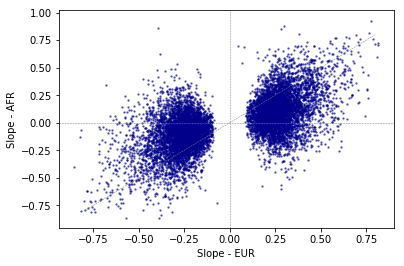

In [28]:
import scipy.stats

PTHRESH = 0.05/data.shape[0]
print(PTHRESH)
pltdata = data[(data["p_values_EUR"]<PTHRESH) | (data["p_values_AFR"]<PTHRESH)]
pltdata = pltdata[pltdata["slope_AFR"].apply(abs) < 1]
pltdata = pltdata[pltdata["slope_EUR"].apply(abs) < 1]


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pltdata["slope_EUR"], pltdata["slope_AFR"], color="darkblue", s=2, alpha=0.5);
ax.axvline(x=0, linestyle="dashed", color="gray", linewidth=0.5)
ax.axhline(y=0, linestyle="dashed", color="gray", linewidth=0.5)
ax.plot([-0.8, 0.8], [-0.8, 0.8], linestyle="dashed", color="gray", linewidth=0.5)
ax.set_xlabel("Slope - EUR")
ax.set_ylabel("Slope - AFR");
print(scipy.stats.pearsonr(pltdata["slope_EUR"], pltdata["slope_AFR"]))